## Flujo de trabajo de un proyecto de Machine Learning

# Entrenar y probar los modelos

- Cuando trabajamos en un problema de clasificación debemos prevenir problemas como el overfitting
- Para ello, muchos investigadores dividen su conjunto de datos en dos subconjuntos: entrenamiento y validación

- Sin embargo, esto es, en general, insuficiente para ajustar los parámetros del algoritmo de aprendizaje
- Una mejor aproximación sería dividir el conjunto de datos en: entrenamiento, validación y test

## Preparación del dataset de entrenamiento

Aprender los parámetros de una función de predicción y probarla con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta pero no podría predecir nada en datos que no haya visto.

Esta situación se llama overfitting, y para evitarlo, es una práctica común cuando se realiza un experimento de aprendizaje automático (supervisado) mantener parte de los datos disponibles como un conjunto de prueba: `X_test`, `y_test`.

In [ ]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

In [ ]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

In [ ]:
scatter(trainX, trainY)

In [ ]:
scatter(testX, testY)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), list(range(5))
print(f'X: {X}')
print(f'\ny: {y}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( , test_size=0.2, random_state=42)

print(f'X_train: \n {X_train} \n')
print(f'y_train: \n {y_train} \n')
print(f'X_test: \n {X_test} \n')
print(f'y_test: \n {y_test} \n')

In [ ]:
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

- A veces dividir el conjunto de entrenamiento en 2 grupos no es suficiente
- Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, como algunas configuraciones se deben establecer manualmente (por ejemplo, para un SVM), existe el riesgo de que el conjunto de pruebas se adapte demasiado porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. 
- De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el rendimiento de la generalización. 

- Para resolver este problema, podemos crear otro conjunto de datos llamado "validación" para ajustar los parámetros del train y así, cuando el experimento parezca tener éxito, la evaluación final se pueda hacer en el conjunto de prueba.

- Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente el número de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).

## Validación cruzada

- La validación cruzada es una técnica para evaluar modelos de ML mediante el entrenamiento de varios modelos de ML en subconjuntos de los datos de entrada disponibles y evaluarlos con el subconjunto complementario de los datos. 
- Se utiliza para detectar el sobreajuste, es decir, en aquellos casos en los que no se logre generalizar un patrón.

### Cross Validation

- El conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario cuando se realiza un CV. 
- En el enfoque básico, denominado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños y se sigue el siguiente procedimiento para cada uno de los k "pliegues":
  1. Se entrena un modelo utilizando `K - 1` folds como dato de entrenamiento.
  2. El modelo resultante se valida en la parte restante de los datos.


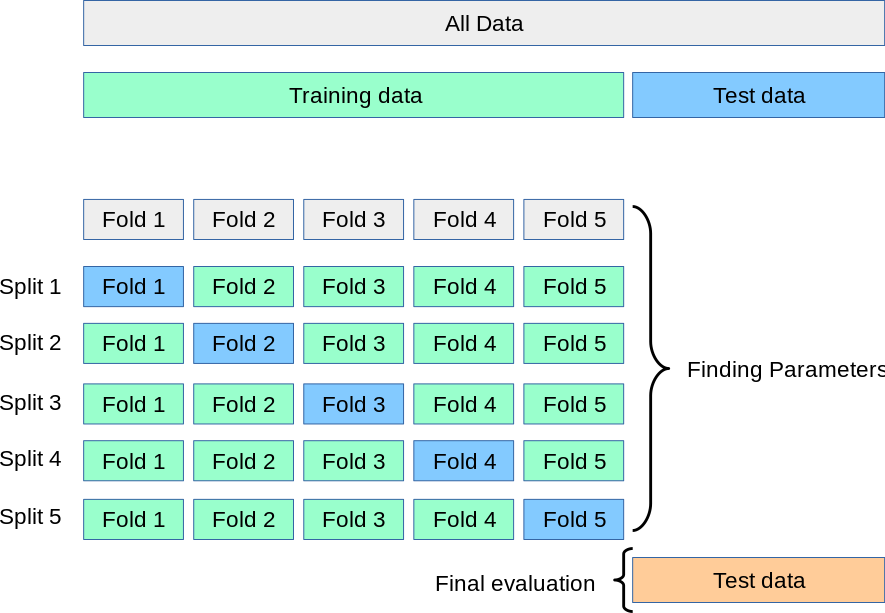
[ref](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

### K-Fold

- K-Fold divide todas las muestras en `k` grupos de muestras, llamados _folds_ de igual tamaño (si es posible). 
- La función de predicción se aprende utilizando los folds `k − 1`, y el fold omitido se usa para la prueba.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

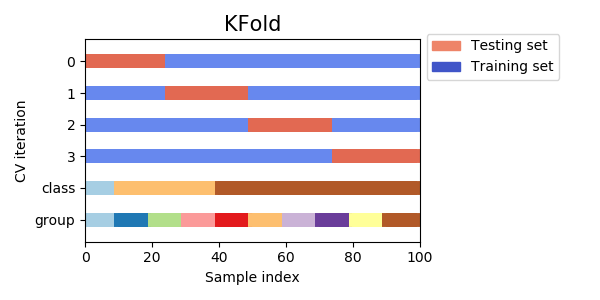

#### LeaveOneOut
- Es un tipo de K-Fold, donde cada conjunto de aprendizaje se crea tomando todas las muestras excepto una, y el conjunto de prueba es la muestra que se omite. 
- Por lo tanto, para `n` muestras, tenemos `n` conjuntos de entrenamiento diferentes y `n` conjunto de pruebas diferentes. 
- Este procedimiento de validación cruzada no desperdicia mucha información, ya que solo se elimina una muestra del conjunto de entrenamiento

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

## Ajuste del modelo: overfitting vs underfitting
- Comprender el ajuste del modelo es importante para comprender la causa raíz para una precisión deficiente del modelo. 
- Esta información le ayudará a tomar medidas correctivas. 
- Podemos determinar si un modelo predictivo presenta underfitting u overfitting de los datos de entrenamiento observando el error de predicción en los datos de entrenamiento y los datos de evaluación.

## Bias-Variance tradeoff
(Ajuste sesgo-varianza)

- Existe una relación entre la capacidad de un modelo para minimizar el sesgo y la varianza. 
- Lograr una comprensión adecuada de estos errores nos ayudaría no solo a construir modelos precisos, sino también a evitar el error de overfitting y underfitting.

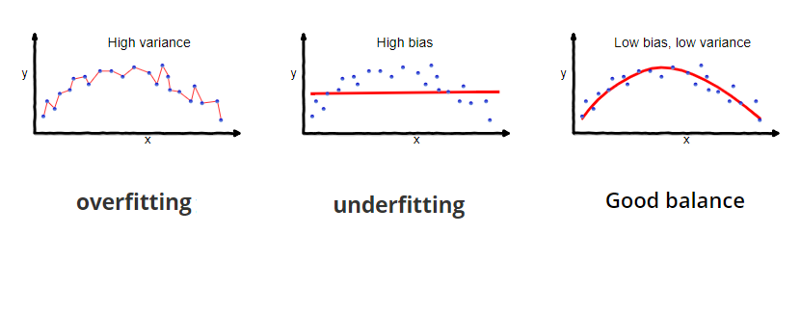

**Bias / sesgo**

- Es la diferencia entre la predicción promedio de nuestro modelo y el valor correcto que estamos tratando de predecir. 
- Un modelo con alto sesgo presta muy poca atención a los datos de entrenamiento y simplifica en exceso el modelo. 
- Siempre conduce a un alto error en la formación y los datos de prueba.

**Varianza / Variance**

- Es la variabilidad de la predicción del modelo para un punto de datos determinado o un valor que nos indica la difusión de nuestros datos. 
- El modelo con alta variación presta mucha atención a los datos de entrenamiento y no generaliza los datos que no ha visto antes. 
- Como resultado, tales modelos funcionan muy bien con los datos de entrenamiento pero tienen altos índices de error en los datos de prueba.

**Underfitting**
- Se produce cuando un modelo no puede capturar el patrón subyacente de los datos. 
- Estos modelos suelen tener **alto sesgo y baja varianza**. 
- Ocurre cuando tenemos mucha menos cantidad de datos para construir un modelo preciso o cuando intentamos construir un modelo lineal con datos no lineales. 
- Además, este tipo de modelos son muy simples para capturar los patrones complejos en datos como la regresión lineal y logística. 

_Cómo evitarlo_

- Probar modelos más complejos. El overfitting puede deberse a que el modelo es demasiado sencillo (las características de entrada no son suficientemente expresivas) como para describir el destino adecuadamente. 
- La precisión en los datos de entrenamiento y prueba podría ser deficiente porque el algoritmo de aprendizaje no tenía datos suficientes de los que aprender:
    - Aumentar el número de ejemplos de datos de entrenamiento.
    - Aumentar el número de pases en los datos de entrenamiento existentes.

- Añadir nuevas características específicas del dominio y más productos cartesianos de características, y cambie los tipos de procesamiento de características utilizado (por ejemplo, aumentando el tamaño n-grams).
- Reducir la cantidad de regularización utilizada.

**Overfitting**

- Ocurre cuando el modelo presenta un buen rendimiento con los datos de entrenamiento pero no con los datos de evaluación. 
- Estos modelos tienen **bajo sesgo y alta varianza**. 
- Esto se debe a que el modelo memoriza los datos que ha visto y no puede generalizar para los ejemplos no vistos.
- Estos modelos suelen ser muy complejos, como los árboles de decisión (que son propensos al overfitting).

_Cómo evitarlo_
- Selección de características: considerar el uso de combinaciones de características, la reducción del tamaño n-grams y la reducción del número de contenedores de atributos.
- Aumente la cantidad de regularización utilizada.

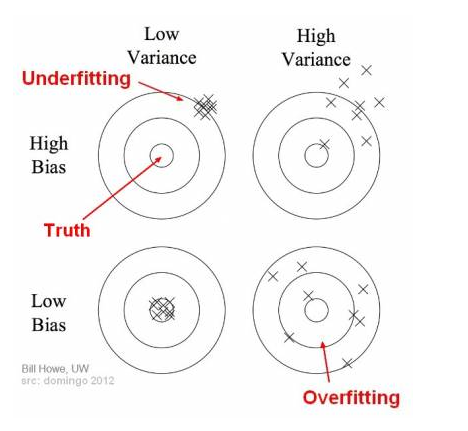
[ref](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)